In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline





# YACIMIENTOS MINERALES

## ¿Qué es un yacimiento mineral?
Un yacimiento mineral es una concentración natural de minerales en la corteza terrestre. Dentro de la minería, un yacimiento mineral está clasificado por grados de concentración de mineral lo suficientemente altos como para que sea económico para la explotación minera extraerlos. Esencialmente, esto significa que por tonelada de roca que contiene los minerales deseados, los costos de eliminar los minerales de la roca y separar el elemento de los minerales son menores que el valor del material por tonelada de roca. La roca que vale la pena extraer se llama mineral.


## Clasificación:
- Combustibles o energéticos: Incluye a los combustibles fósiles (carbón, petróleo, gas e hidrocarburos naturales), y los minerales de torio y uranio que se emplean como fuente combustible para los reactores nucleares.

- No metálicos o industriales: Incluyen a las rocas y minerales en las que el propio mineral o roca o un compuesto derivado de él tiene una utilidad o una aplicación industrial (áridos, rocas ornamentales, minerales refractarios, abrasivos, absorbentes, lubricantes, entre muchos otros).

- Metálicos: Incluye todos los minerales de los que se extraen metales.


## SOBRE EL DATASET

CONTEXTO ANALITICO

    El Dataset con el que se trabajará a continuación corresponde a un conjunto de datos referidos a la distribución de los yacimientos minerales a lo largo del mundo.
    El archivo .csv utilizado fue descargado de la página kaggle.com.

CONTEXTO COMERCIAL

    El objetivo del presente trabajo es analizar la distribución de los yacimientos minerales en el mundo, para posteriormente hacer foco en los presentes en Argentina, así como también en los tipos de minerales que adquieren mayor preponderancia en nuestro país y su distribución de acuerdo a nuestra geografía.
    

In [4]:
pd.read_csv('/workspaces/CoderHouse_CH-32845/data/raw/YacimientosMinerales.csv')



,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,...,dep_type,prod_size,dev_stat,ore,gangue,work_type,names,ore_ctrl,hrock_type,arock_type
0,Lookout Prospect,55.05612,-132.14344,NaN,United States,Alaska,NaN,M,Copper,"Gold, Silver",...,NaN,N,Occurrence,"Chalcopyrite, Covellite, Pyrite","Quartz, Sericite",NaN,"Conundrum, Mammoth, Wakefield Minerals Co.",NaN,Schist,NaN
1,Lucky Find Prospect,55.52751,-132.68514,NaN,United States,Alaska,NaN,M,Copper,Gold,...,NaN,N,Occurrence,"Chalcopyrite, Pyrite","Calcite, Quartz, Siderite",Underground,NaN,Vein Follows Contact,Diabase,NaN
2,Mccullough Prospect,55.97751,-132.99906,NaN,United States,Alaska,NaN,M,Copper,NaN,...,NaN,N,Occurrence,"Chalcopyrite, Pyrite, Sphalerite",Quartz,NaN,"Claims: Horseshoe, Copper, Lake Bay",NaN,Siltstone,NaN
3,Lucky Jim Claim,55.52195,-132.68653,NaN,United States,Alaska,NaN,M,Gold,NaN,...,NaN,N,Occurrence,"Galena, Malachite, Pyrite",NaN,NaN,NaN,NaN,Granite,Granite
4,Matilda Occurrence,55.14556,-132.05233,NaN,United States,Alaska,NaN,M,Gold,NaN,...,NaN,N,Occurrence,Pyrite,NaN,NaN,NaN,NaN,Mica Schist,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304627,Mackenzie District,6.00128,-58.16600,SA,Guyana,NaN,NaN,M,Aluminum,NaN,...,LATERITIC BAUXITE,L,Producer,NaN,NaN,NaN,"Montgomery Mine, Maria Elizabeth Mine",PRE-PLIOCENE PENEPLAIN,NaN,NaN
304628,Cuale District,20.38117,-105.10877,NaN,Mexico,Jalisco,NaN,NaN,"Copper, Gold, Silver, Lead, Zinc",NaN,...,NaN,Y,Producer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304629,Agalteca,14.44527,-87.29280,NaN,Honduras,NaN,NaN,M,Iron,NaN,...,"SKARN, REPLACEMENT",M,Prospect,NaN,NaN,NaN,"Group P, O, Q, C, B",NaN,NaN,NaN
304630,La Libertad Area,12.21347,-85.16665,NaN,Nicaragua,Chontales,NaN,NaN,Gold,Silver,...,"EPITHERMAL VEINS, SHEAR ZONES, VEIN",M,Producer,NaN,NaN,NaN,"San Juan Mine, Babilonia Mine, Chamarro Prospe...",INTERSECTIONS OF NE AND NW STRUCTURAL ELEMENTS...,NaN,NaN


## DESCRIPCIÓN DEL DATASET:

- site_name: Nombre del yacimeinto
- latitude: Latitud del yacimiento
- longitude: Longitud del yacimiento
- region: Continente donde se ubica el yacimiento
- country: País donde se ubica el yacimiento
- state: Estado/provincia donde se ubica el yacimiento
- com_type: tipo de compuesto
- commod1: principal compuesto de interés del yacimiento
- commod2: segundo compuesto de interés del yacimiento
- commod3: tercer compuesto de interés del yacimiento
- oper_type: Dónde está presente el mineral de interés y qué tipo de operación requiere para su extracción?
- dep_type: cómo se presenta el mineral de interés
- prod_size: cantidad de mineral producido
- dev_stat: estado de desarrollo del yacimiento
- ore: principal elemento o compuesto de interés económico del yacimiento. También llamada "mena"
- gangue: elemento o compuesto de interés económico secundario del yacimiento. Muchas veces aparece junto con a la mena
- work_type: tipo de explotación requerida para desarrollar el yacimiento
- names: otra denominación o nombre del yacmiento
- ore_ctrl: característica geológica que ha influido en la deposición del mineral.
- hrock_type: roca principal de alojamiento del mineral de interés
- arock_type: roca secundaria de alojamiento mineral de interés



In [5]:
df = pd.read_csv('/workspaces/CoderHouse_CH-32845/data/raw/YacimientosMinerales.csv')
df.head()



,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,...,dep_type,prod_size,dev_stat,ore,gangue,work_type,names,ore_ctrl,hrock_type,arock_type
0,Lookout Prospect,55.05612,-132.14344,NaN,United States,Alaska,NaN,M,Copper,"Gold, Silver",...,NaN,N,Occurrence,"Chalcopyrite, Covellite, Pyrite","Quartz, Sericite",NaN,"Conundrum, Mammoth, Wakefield Minerals Co.",NaN,Schist,NaN
1,Lucky Find Prospect,55.52751,-132.68514,NaN,United States,Alaska,NaN,M,Copper,Gold,...,NaN,N,Occurrence,"Chalcopyrite, Pyrite","Calcite, Quartz, Siderite",Underground,NaN,Vein Follows Contact,Diabase,NaN
2,Mccullough Prospect,55.97751,-132.99906,NaN,United States,Alaska,NaN,M,Copper,NaN,...,NaN,N,Occurrence,"Chalcopyrite, Pyrite, Sphalerite",Quartz,NaN,"Claims: Horseshoe, Copper, Lake Bay",NaN,Siltstone,NaN
3,Lucky Jim Claim,55.52195,-132.68653,NaN,United States,Alaska,NaN,M,Gold,NaN,...,NaN,N,Occurrence,"Galena, Malachite, Pyrite",NaN,NaN,NaN,NaN,Granite,Granite
4,Matilda Occurrence,55.14556,-132.05233,NaN,United States,Alaska,NaN,M,Gold,NaN,...,NaN,N,Occurrence,Pyrite,NaN,NaN,NaN,NaN,Mica Schist,NaN


El dataset seleccionado cuenta con 304632 filas y 22 columnas

In [7]:
display(df.shape)

(304632, 22)

El dataset cuenta con los siguientes nombres en sus columnas:

In [8]:
df.columns

Index(['site_name', 'latitude', 'longitude', 'region', 'country', 'state',
       'county', 'com_type', 'commod1', 'commod2', 'commod3', 'oper_type',
       'dep_type', 'prod_size', 'dev_stat', 'ore', 'gangue', 'work_type',
       'names', 'ore_ctrl', 'hrock_type', 'arock_type'],
      dtype='object')

El dataset cuenta con los siguientes tipos de datos en sus columnas:

In [10]:
df.dtypes

site_name      object
latitude      float64
longitude     float64
region         object
country        object
state          object
county         object
com_type       object
commod1        object
commod2        object
commod3        object
oper_type      object
dep_type       object
prod_size      object
dev_stat       object
ore            object
gangue         object
work_type      object
names          object
ore_ctrl       object
hrock_type     object
arock_type     object
dtype: object

La información proporcionada es la siguiente:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304632 entries, 0 to 304631
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   site_name   304621 non-null  object 
 1   latitude    304613 non-null  float64
 2   longitude   304613 non-null  float64
 3   region      31179 non-null   object 
 4   country     304617 non-null  object 
 5   state       292148 non-null  object 
 6   county      252873 non-null  object 
 7   com_type    300815 non-null  object 
 8   commod1     283601 non-null  object 
 9   commod2     21632 non-null   object 
 10  commod3     63139 non-null   object 
 11  oper_type   304632 non-null  object 
 12  dep_type    37483 non-null   object 
 13  prod_size   108352 non-null  object 
 14  dev_stat    304632 non-null  object 
 15  ore         70558 non-null   object 
 16  gangue      33008 non-null   object 
 17  work_type   25600 non-null   object 
 18  names       65340 non-null   object 
 19  or

In [12]:
df.head(10)


,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,...,dep_type,prod_size,dev_stat,ore,gangue,work_type,names,ore_ctrl,hrock_type,arock_type
0,Lookout Prospect,55.05612,-132.14344,NaN,United States,Alaska,NaN,M,Copper,"Gold, Silver",...,NaN,N,Occurrence,"Chalcopyrite, Covellite, Pyrite","Quartz, Sericite",NaN,"Conundrum, Mammoth, Wakefield Minerals Co.",NaN,Schist,NaN
1,Lucky Find Prospect,55.52751,-132.68514,NaN,United States,Alaska,NaN,M,Copper,Gold,...,NaN,N,Occurrence,"Chalcopyrite, Pyrite","Calcite, Quartz, Siderite",Underground,NaN,Vein Follows Contact,Diabase,NaN
2,Mccullough Prospect,55.97751,-132.99906,NaN,United States,Alaska,NaN,M,Copper,NaN,...,NaN,N,Occurrence,"Chalcopyrite, Pyrite, Sphalerite",Quartz,NaN,"Claims: Horseshoe, Copper, Lake Bay",NaN,Siltstone,NaN
3,Lucky Jim Claim,55.52195,-132.68653,NaN,United States,Alaska,NaN,M,Gold,NaN,...,NaN,N,Occurrence,"Galena, Malachite, Pyrite",NaN,NaN,NaN,NaN,Granite,Granite
4,Matilda Occurrence,55.14556,-132.05233,NaN,United States,Alaska,NaN,M,Gold,NaN,...,NaN,N,Occurrence,Pyrite,NaN,NaN,NaN,NaN,Mica Schist,NaN
5,Marion Prospect,55.14695,-132.48512,NaN,United States,Alaska,NaN,M,Copper,NaN,...,NaN,N,Occurrence,"Chalcopyrite, Galena, Pyrite",NaN,Underground,Nutqua Gold Mining Co.,NaN,Schist,NaN
6,Marble Heart Prospect,55.32890,-132.76013,NaN,United States,Alaska,NaN,M,Lead,NaN,...,NaN,N,Occurrence,Galena,NaN,NaN,NaN,NaN,Limestone,NaN
7,Morning Star Prospect,55.56362,-132.45042,NaN,United States,Alaska,NaN,M,Gold,Copper,...,NaN,N,Occurrence,"Chalcopyrite, Magnetite, Pyrite",NaN,NaN,NaN,NaN,NaN,NaN
8,Monday Prospect,55.50529,-132.63237,NaN,United States,Alaska,NaN,M,Silver,Gold,...,Vein,N,Occurrence,"Galena, Pyrite","Quartz, Vesuvianite",NaN,NaN,NaN,Slate,Andesite
9,Miller Brothers Claim,55.22334,-132.63513,NaN,United States,Alaska,NaN,M,"Copper, Gold",NaN,...,NaN,N,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.tail(10)


,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,...,dep_type,prod_size,dev_stat,ore,gangue,work_type,names,ore_ctrl,hrock_type,arock_type
304622,Dubuque Subdistrict,42.58171,-90.87233,NaN,United States,Iowa,"Jackson, Clayton, Dubuque",M,"Zinc, Lead",NaN,...,MISSISSIPPI VALLEY-TYPE LEAD-ZINC,Y,Past Producer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304623,Molango,20.83386,-98.73361,NaN,Mexico,Hidalgo,NaN,M,Manganese,NaN,...,MARINE CHEMICAL SEDIMENT,NaN,Producer,NaN,NaN,NaN,"Tetzintla, Naopa, Acoxcatlan, Comextetintla De...",NaN,NaN,NaN
304624,Windarra District,-28.47951,122.23250,OC,Australia,Western Australia,NaN,M,"Nickel, Cobalt, Copper",NaN,...,"MAGMATIC, ULTRAMAFIC, STRATIFORM, MASSIVE, DIS...",Y,Producer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304625,Kouaoua,-21.39691,165.74852,OC,France,Territory of New Caledonia and Dependencies,NaN,M,"Nickel, Cobalt, Iron",NaN,...,"LATERITE, RESIDUAL ENRICHMENT",Y,Producer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304626,Congonhas,-20.49747,-43.87395,SA,Brazil,Minas Gerais,NaN,M,Iron,NaN,...,"BANDED IRON, SEDIMENTARY",Y,Producer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304627,Mackenzie District,6.00128,-58.16600,SA,Guyana,NaN,NaN,M,Aluminum,NaN,...,LATERITIC BAUXITE,L,Producer,NaN,NaN,NaN,"Montgomery Mine, Maria Elizabeth Mine",PRE-PLIOCENE PENEPLAIN,NaN,NaN
304628,Cuale District,20.38117,-105.10877,NaN,Mexico,Jalisco,NaN,NaN,"Copper, Gold, Silver, Lead, Zinc",NaN,...,NaN,Y,Producer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304629,Agalteca,14.44527,-87.29280,NaN,Honduras,NaN,NaN,M,Iron,NaN,...,"SKARN, REPLACEMENT",M,Prospect,NaN,NaN,NaN,"Group P, O, Q, C, B",NaN,NaN,NaN
304630,La Libertad Area,12.21347,-85.16665,NaN,Nicaragua,Chontales,NaN,NaN,Gold,Silver,...,"EPITHERMAL VEINS, SHEAR ZONES, VEIN",M,Producer,NaN,NaN,NaN,"San Juan Mine, Babilonia Mine, Chamarro Prospe...",INTERSECTIONS OF NE AND NW STRUCTURAL ELEMENTS...,NaN,NaN
304631,Santo Domingo,12.25517,-85.08325,NaN,Nicaragua,Chontales,NaN,NaN,Gold,Silver,...,EPITHERMAL VEINS,M,Past Producer,NaN,NaN,NaN,"San Gregorio, Estrerella, San Antonio, San Ben...",INTERSECTIONS OF NE AND NW STRUCTURAL ELEMENTS...,NaN,NaN


In [14]:
df.sample(10)


,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,...,dep_type,prod_size,dev_stat,ore,gangue,work_type,names,ore_ctrl,hrock_type,arock_type
96450,Jordan,39.24628,-121.08798,NaN,United States,California,Nevada,M,Gold,"Copper, Lead",...,NaN,Y,Producer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177828,La India,28.00587,-105.73942,NaN,Mexico,Chihuahua,NaN,M,Gold,NaN,...,NaN,NaN,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112382,Swift and Bennett,38.90099,-120.83792,NaN,United States,California,El Dorado,M,Gold,NaN,...,NaN,NaN,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264759,Materials Pit 59-50-F,34.65179,-103.05268,NaN,United States,New Mexico,Curry,N,"Sand and Gravel, Construction",NaN,...,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111627,Eureka,38.24351,-120.76991,NaN,United States,California,Calaveras,M,Copper,NaN,...,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51553,Basalt Quarry,43.41792,-118.56159,NaN,United States,Oregon,Harney,N,Stone,NaN,...,NaN,Y,Past Producer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197792,Unknown,40.13163,-113.85144,NaN,United States,Utah,Tooele,B,Iron,NaN,...,NaN,NaN,Prospect,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29447,Unknown,41.09289,-123.91781,NaN,United States,California,Humboldt,M,Gold,NaN,...,Placer,N,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130444,Dzhambul Phosacid Complex,42.83141,71.41742,AS,Kazakhstan,NaN,NaN,N,Phosphorus-Phosphates,NaN,...,NaN,NaN,Plant,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90738,Name Unknown Southeast of Cotui,18.98813,-70.12372,CR,Dominican Republic,La Vega,NaN,N,Clay,NaN,...,NaN,N,Occurrence,Clay,NaN,NaN,NaN,NaN,NaN,NaN


A continuación, se harán una serie de análisis de manera global, con el objetivo de estudiar la distribución de los yacimientos minerales en forma general, para posteriormente hacer foco en nuestro país.

## PAISES CON MAYOR CANTIDAD DE YACIMIENTOS MINERALES

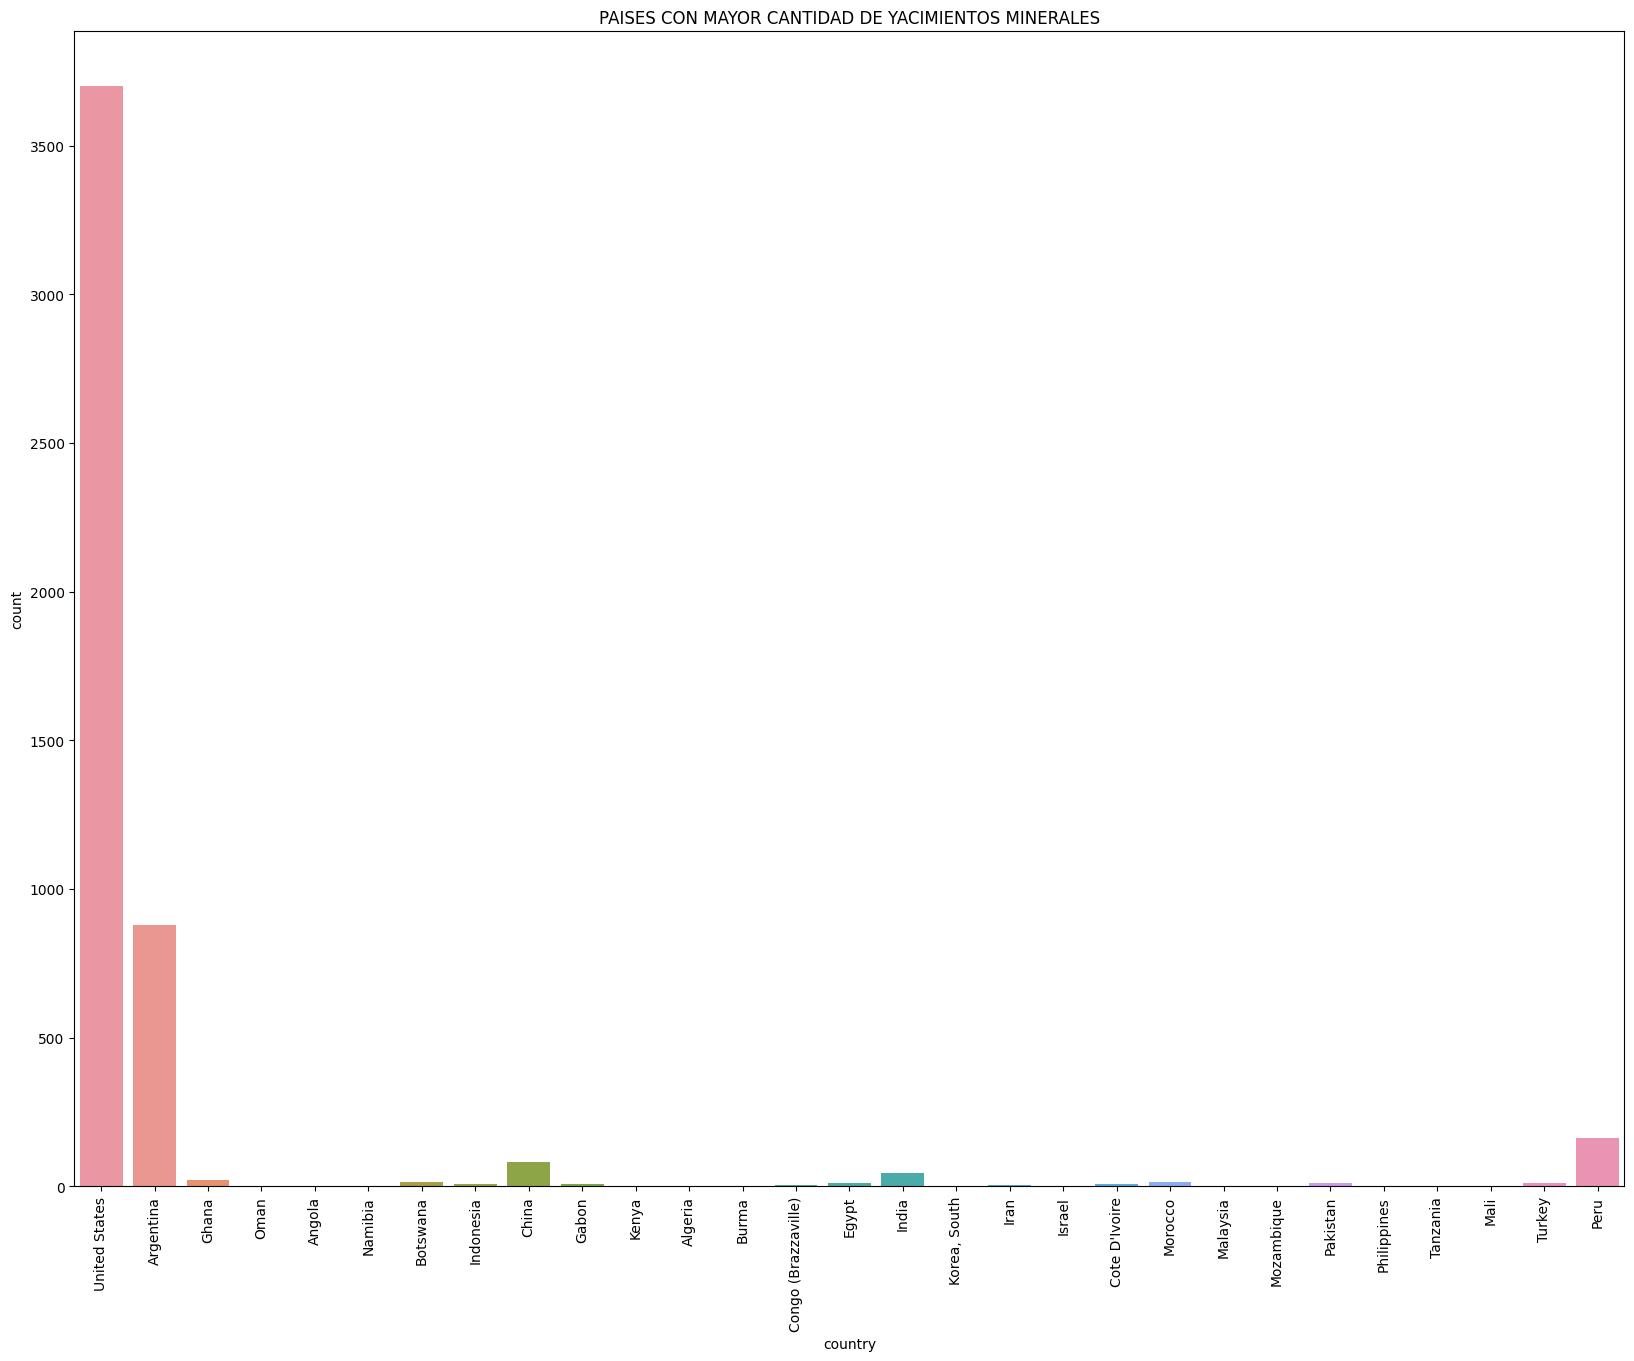

In [17]:
plt.figure(figsize=(20,15))
plt.title("PAISES CON MAYOR CANTIDAD DE YACIMIENTOS MINERALES")
sns.countplot(x=df['country'].head(5000))
plt.xticks(rotation=90)
plt.show()

De este gráfico se puede determinar que Estados Unidos, con una amplia diferencia, y posteriormente Argentina, lideran el reanking de países con mayores depositos minerales. Luego, completando el top 5, continúa Perú, China y por último India.

## ESTADOS/PROVINCIAS CON MAYOR CANTIDAD DE YACIMIENTOS

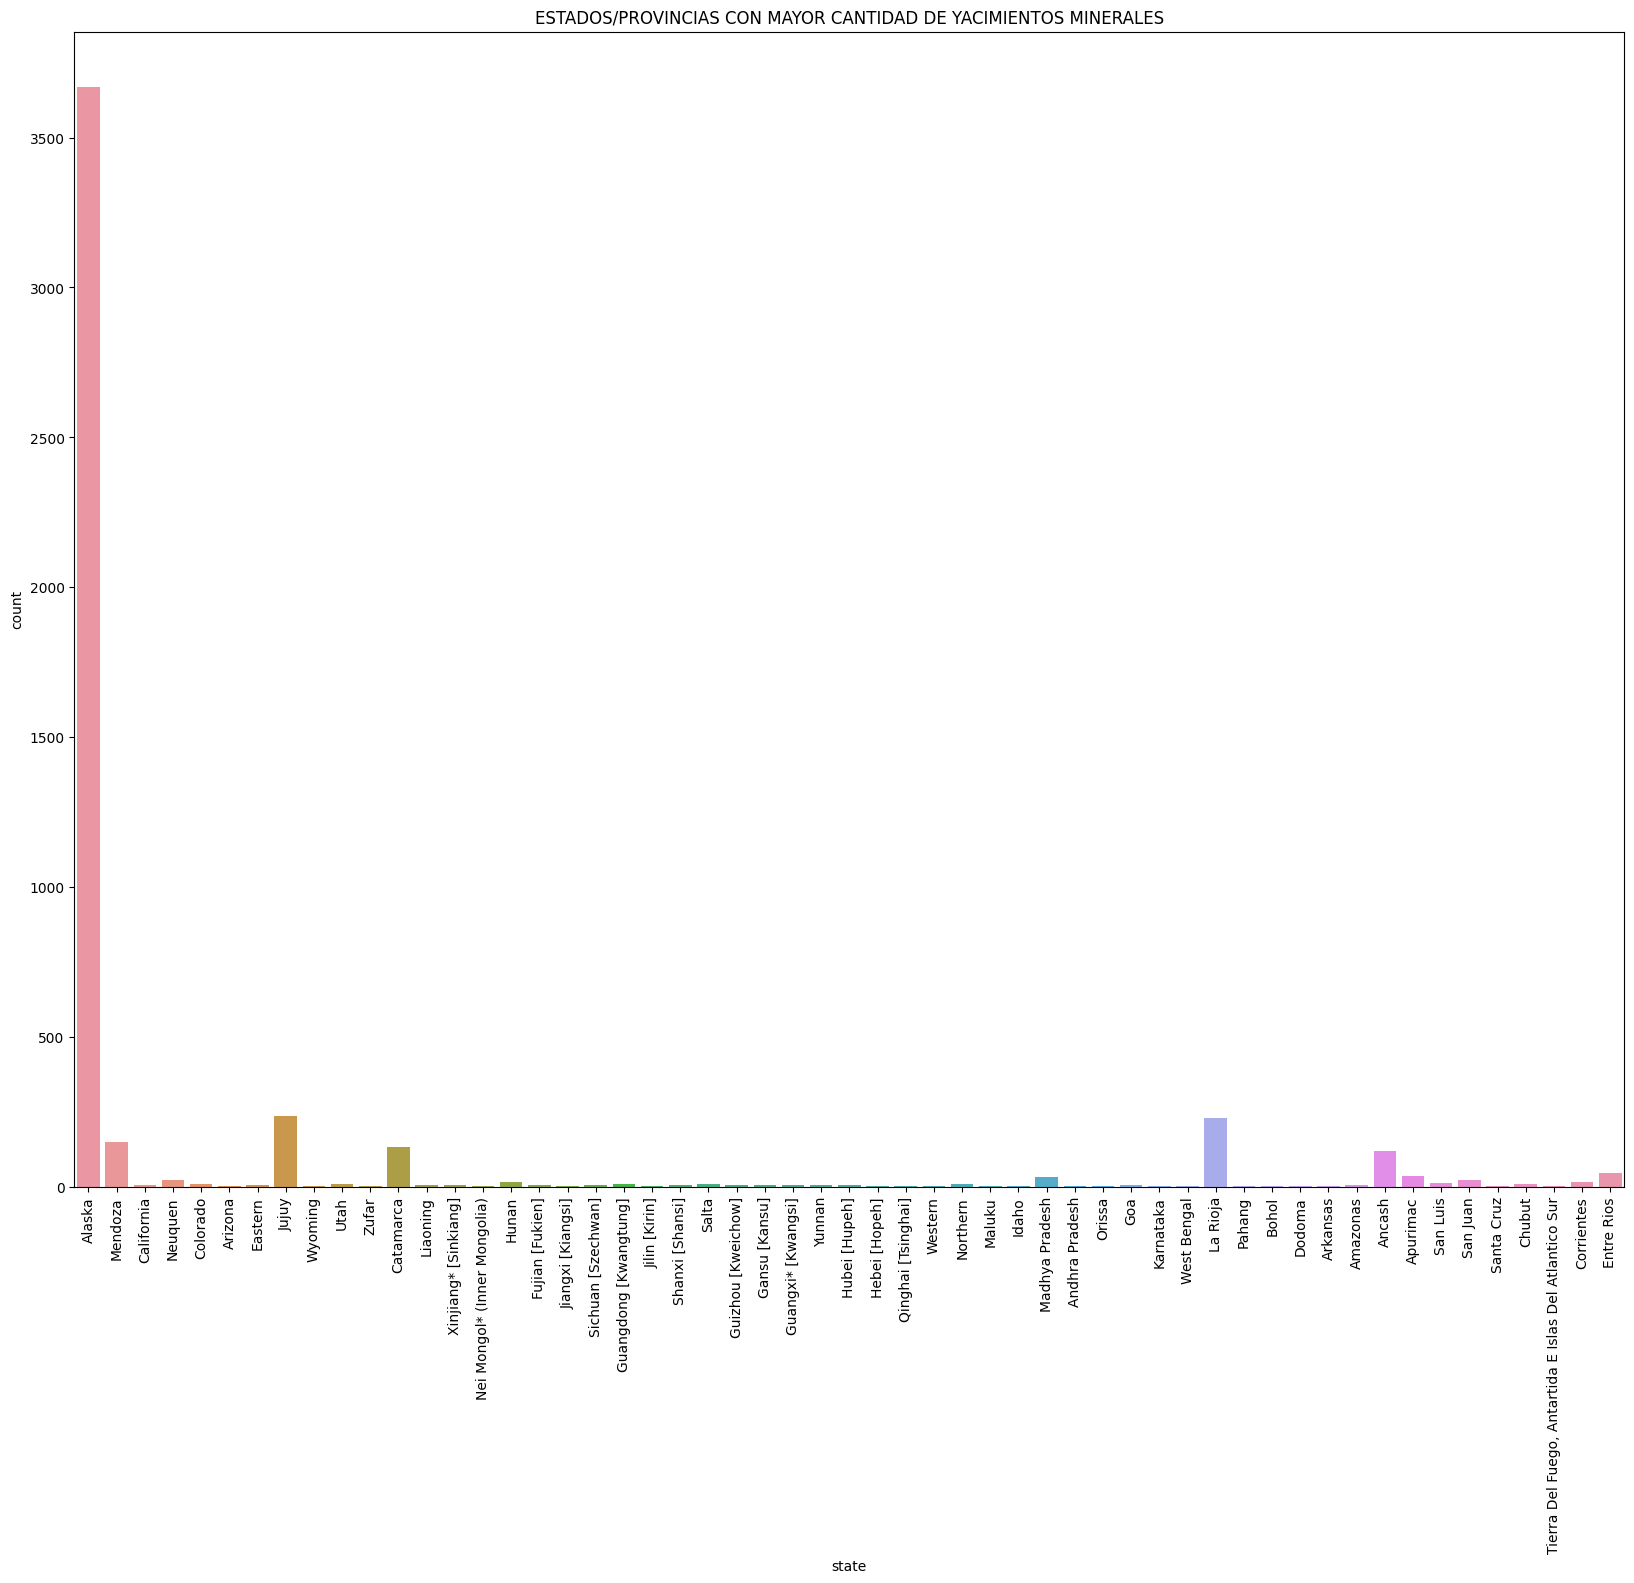

In [18]:
plt.figure(figsize=(20,15))
plt.title("ESTADOS/PROVINCIAS CON MAYOR CANTIDAD DE YACIMIENTOS MINERALES")
sns.countplot(x=df['state'].head(5000))
plt.xticks(rotation=90)
plt.show()

Al analizar el gráfico se puede notar que Argentina adquiere gran prepondrancia en cuando a la cantidad de Yacimientos, ya que en la lista de los 5 primeros estados/provincias encontramos 4 que son de nuestro país. De esta manera la lista se conforma, en orden decreciente, de la siguiente manera:
- Alaska
- Jujuy
- La Rioja
- Catamarca
- Mendoza

## PRINCIPALES TIPOS DE COMMODITIES PRIMARIOS

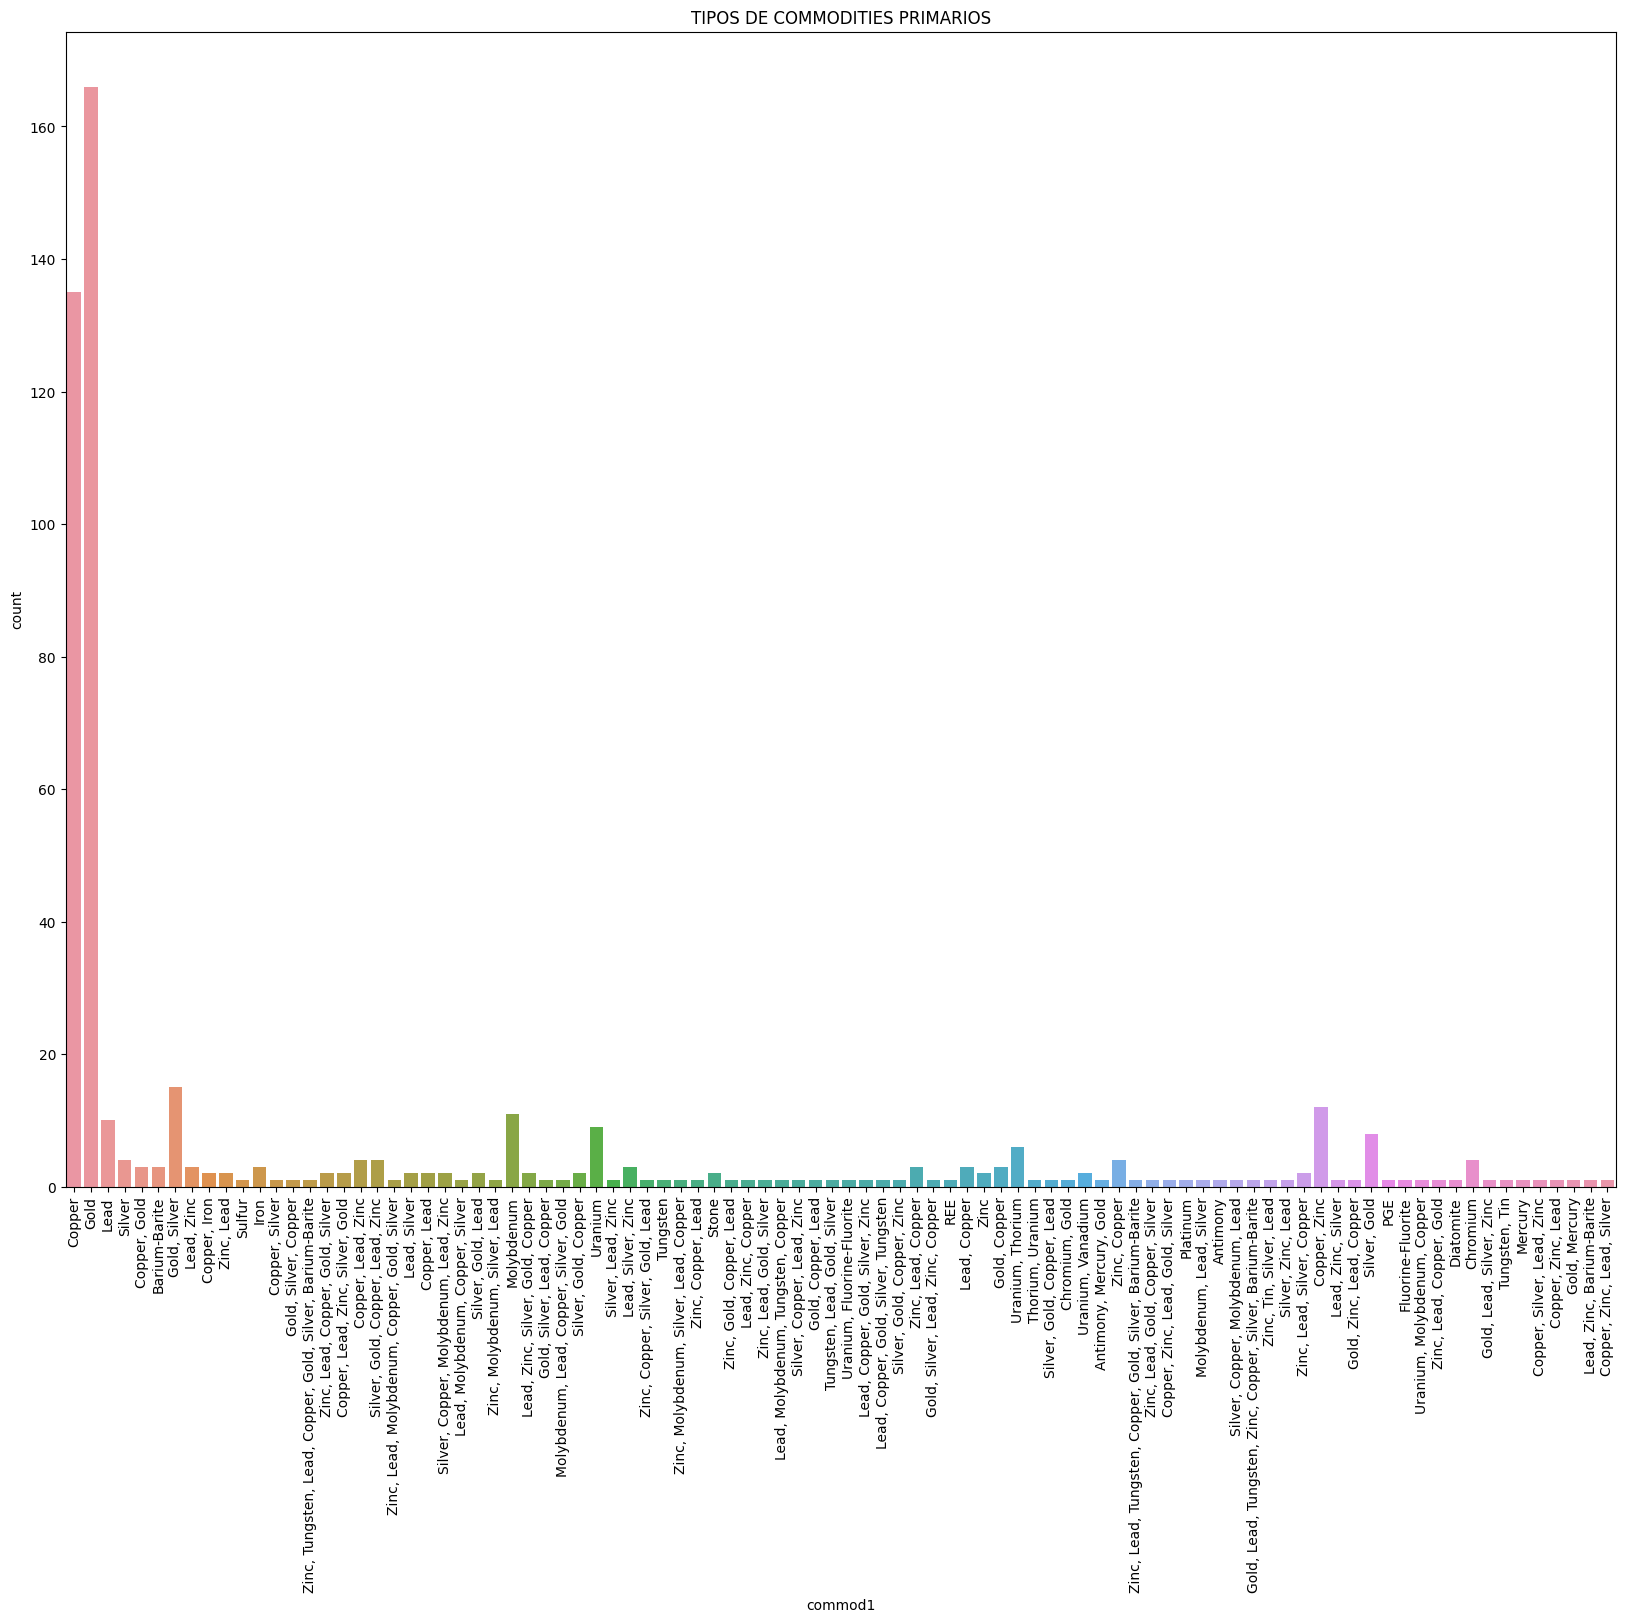

In [32]:
plt.figure(figsize=(20,15))
plt.title("TIPOS DE COMMODITIES PRIMARIOS")
sns.countplot(x=df['commod1'].head(500))
plt.xticks(rotation=90)
plt.show()

El mineral con mayor importancia es el oro, seguido por el cobre.

## PRINCIPALES TIPOS DE COMMODITIES SECUNDARIOS

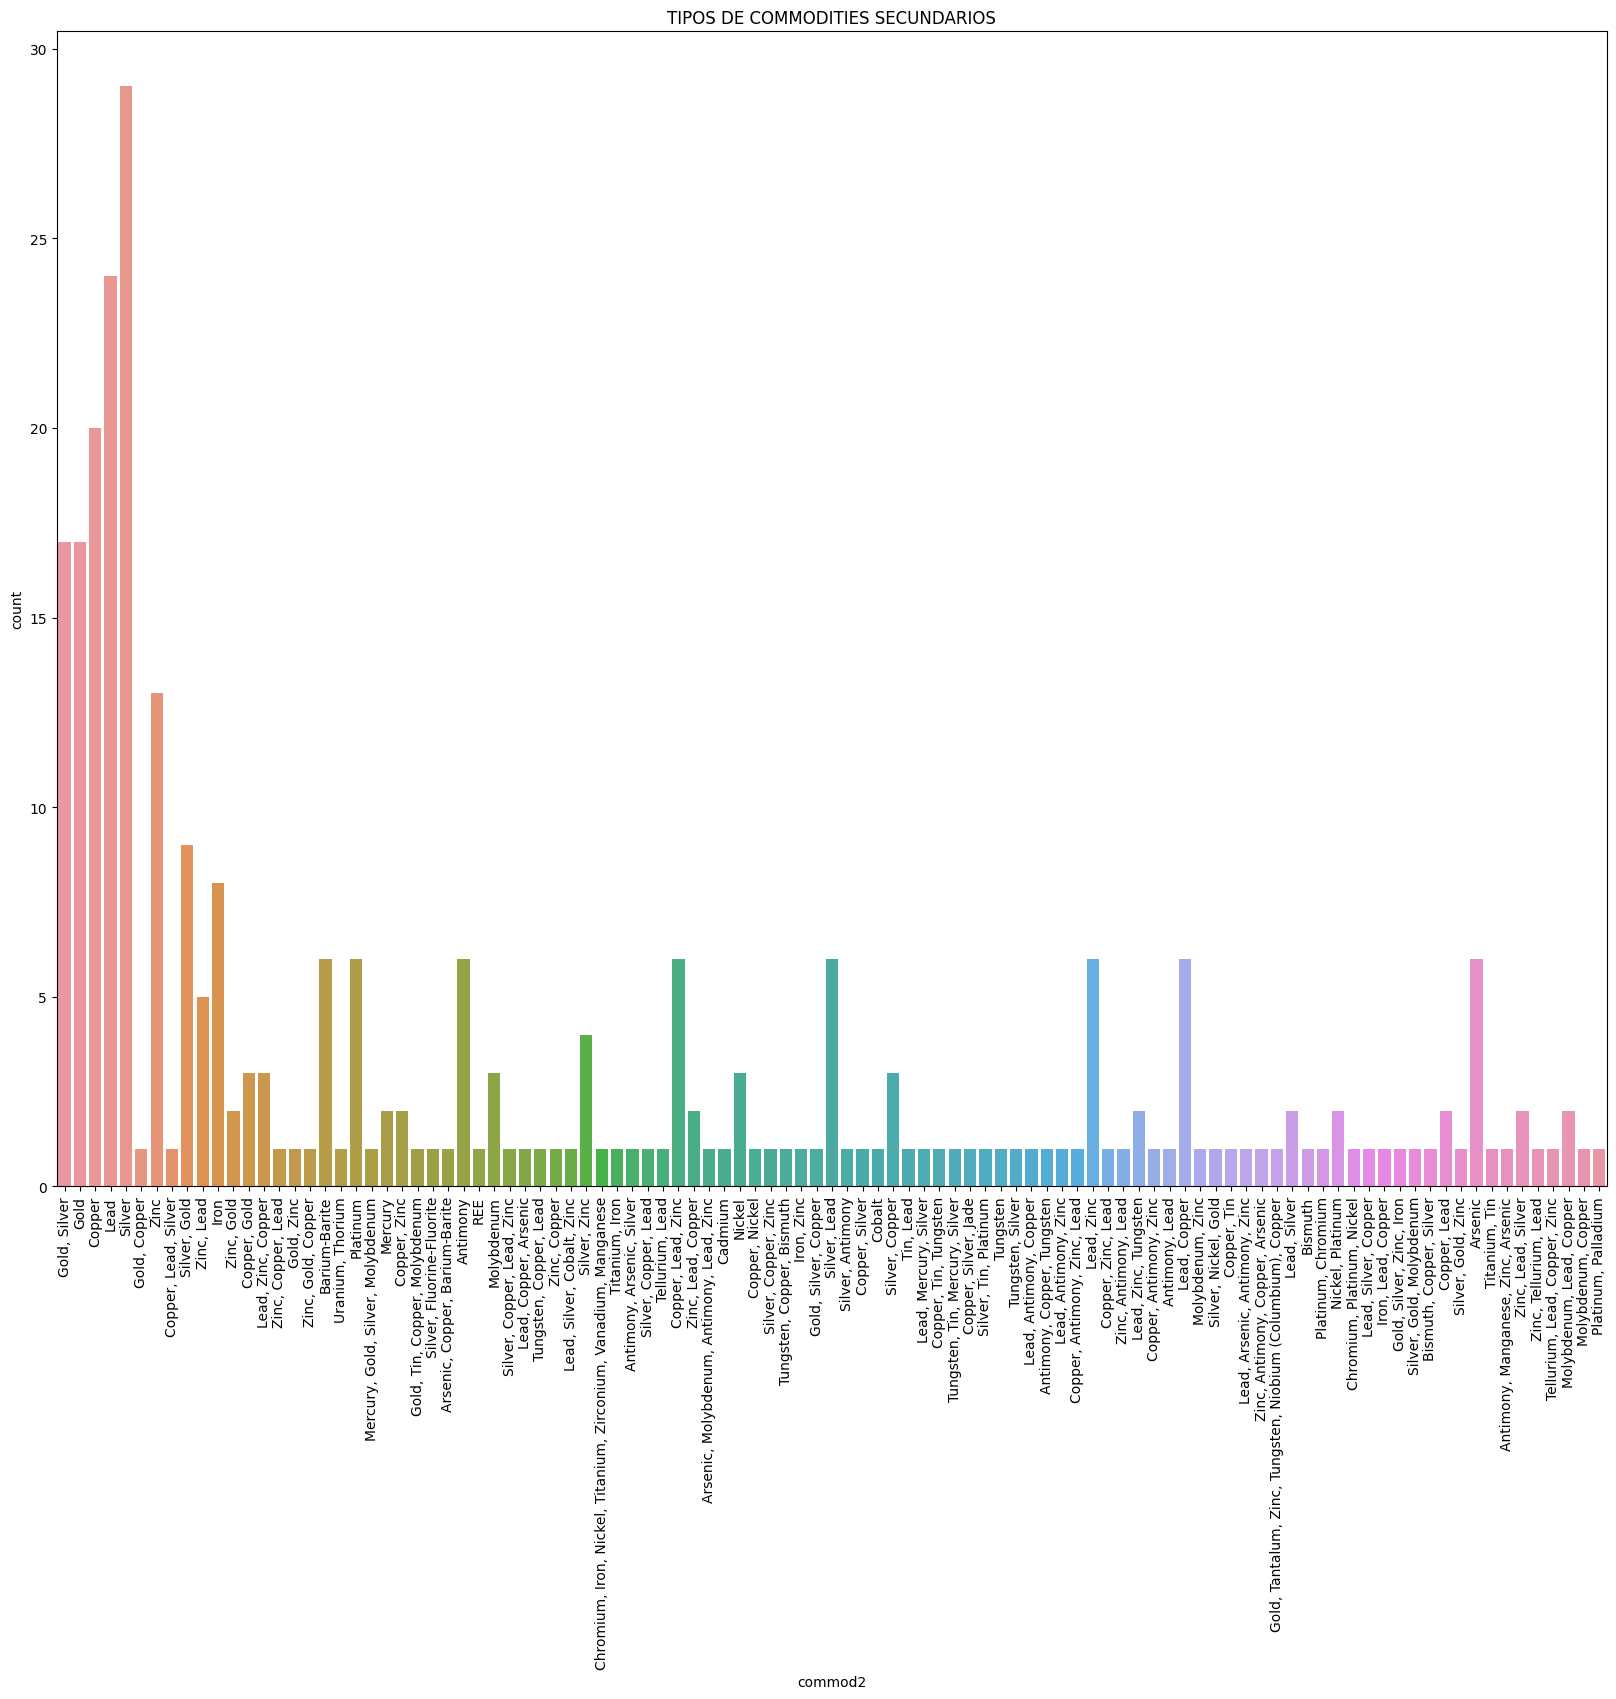

In [33]:
plt.figure(figsize=(20,15))
plt.title("TIPOS DE COMMODITIES SECUNDARIOS")
sns.countplot(x=df['commod2'].head(1000))
plt.xticks(rotation=90)
plt.show()

## PRINCIPALES TIPOS DE COMMODITIES TERCIARIOS

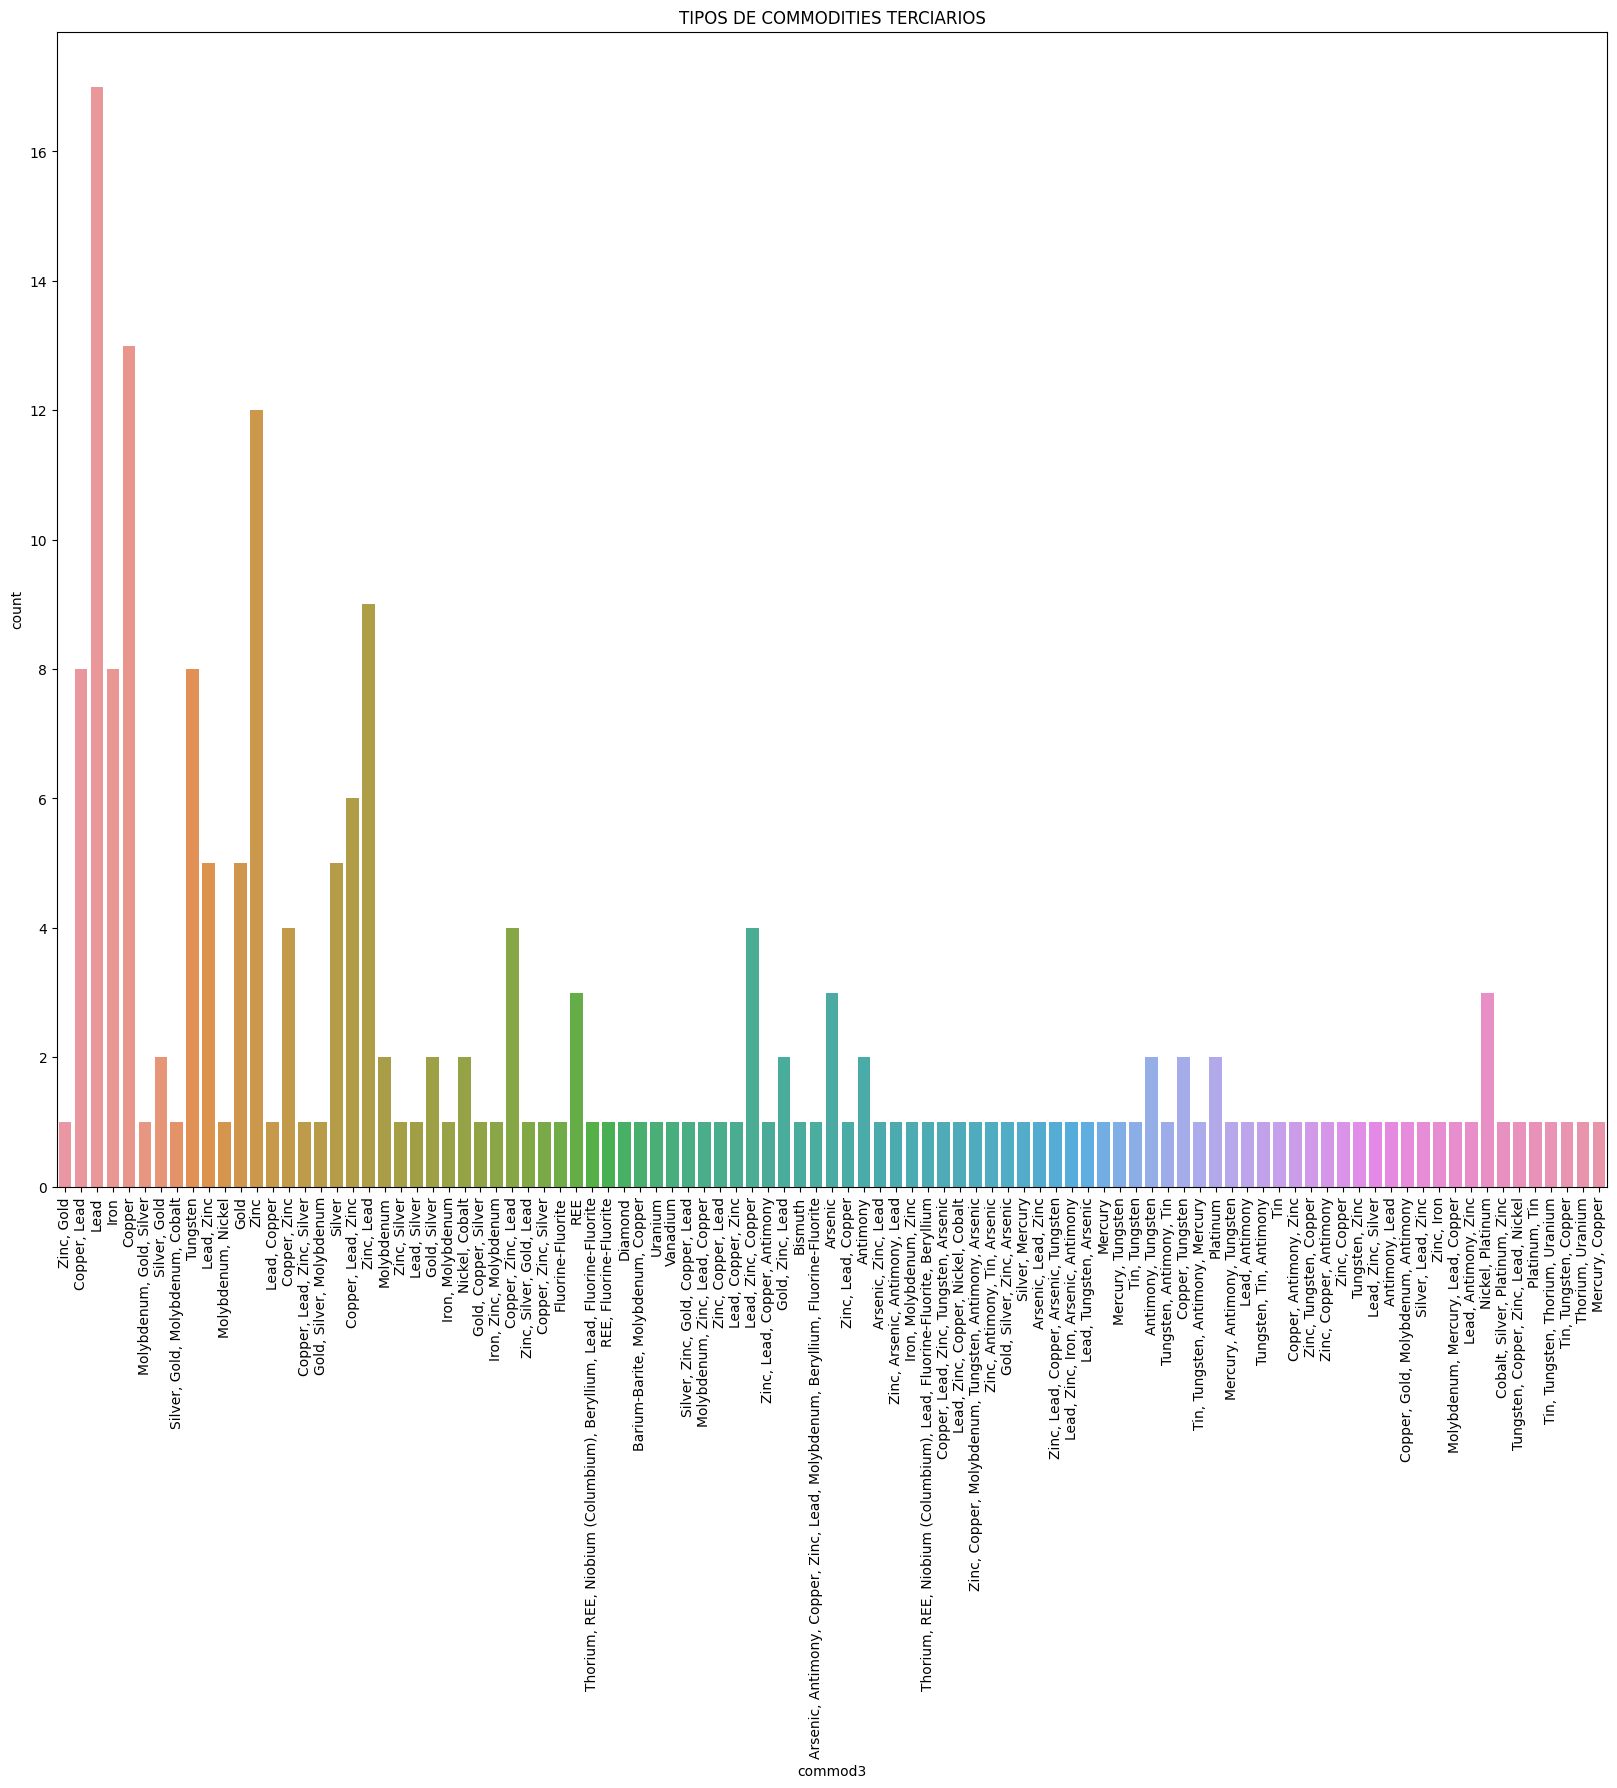

In [34]:
plt.figure(figsize=(20,15))
plt.title("TIPOS DE COMMODITIES TERCIARIOS")
sns.countplot(x=df['commod3'].head(1000))
plt.xticks(rotation=90)
plt.show()

## FORMA DE APARIENCIA DEL YACIMIENTO

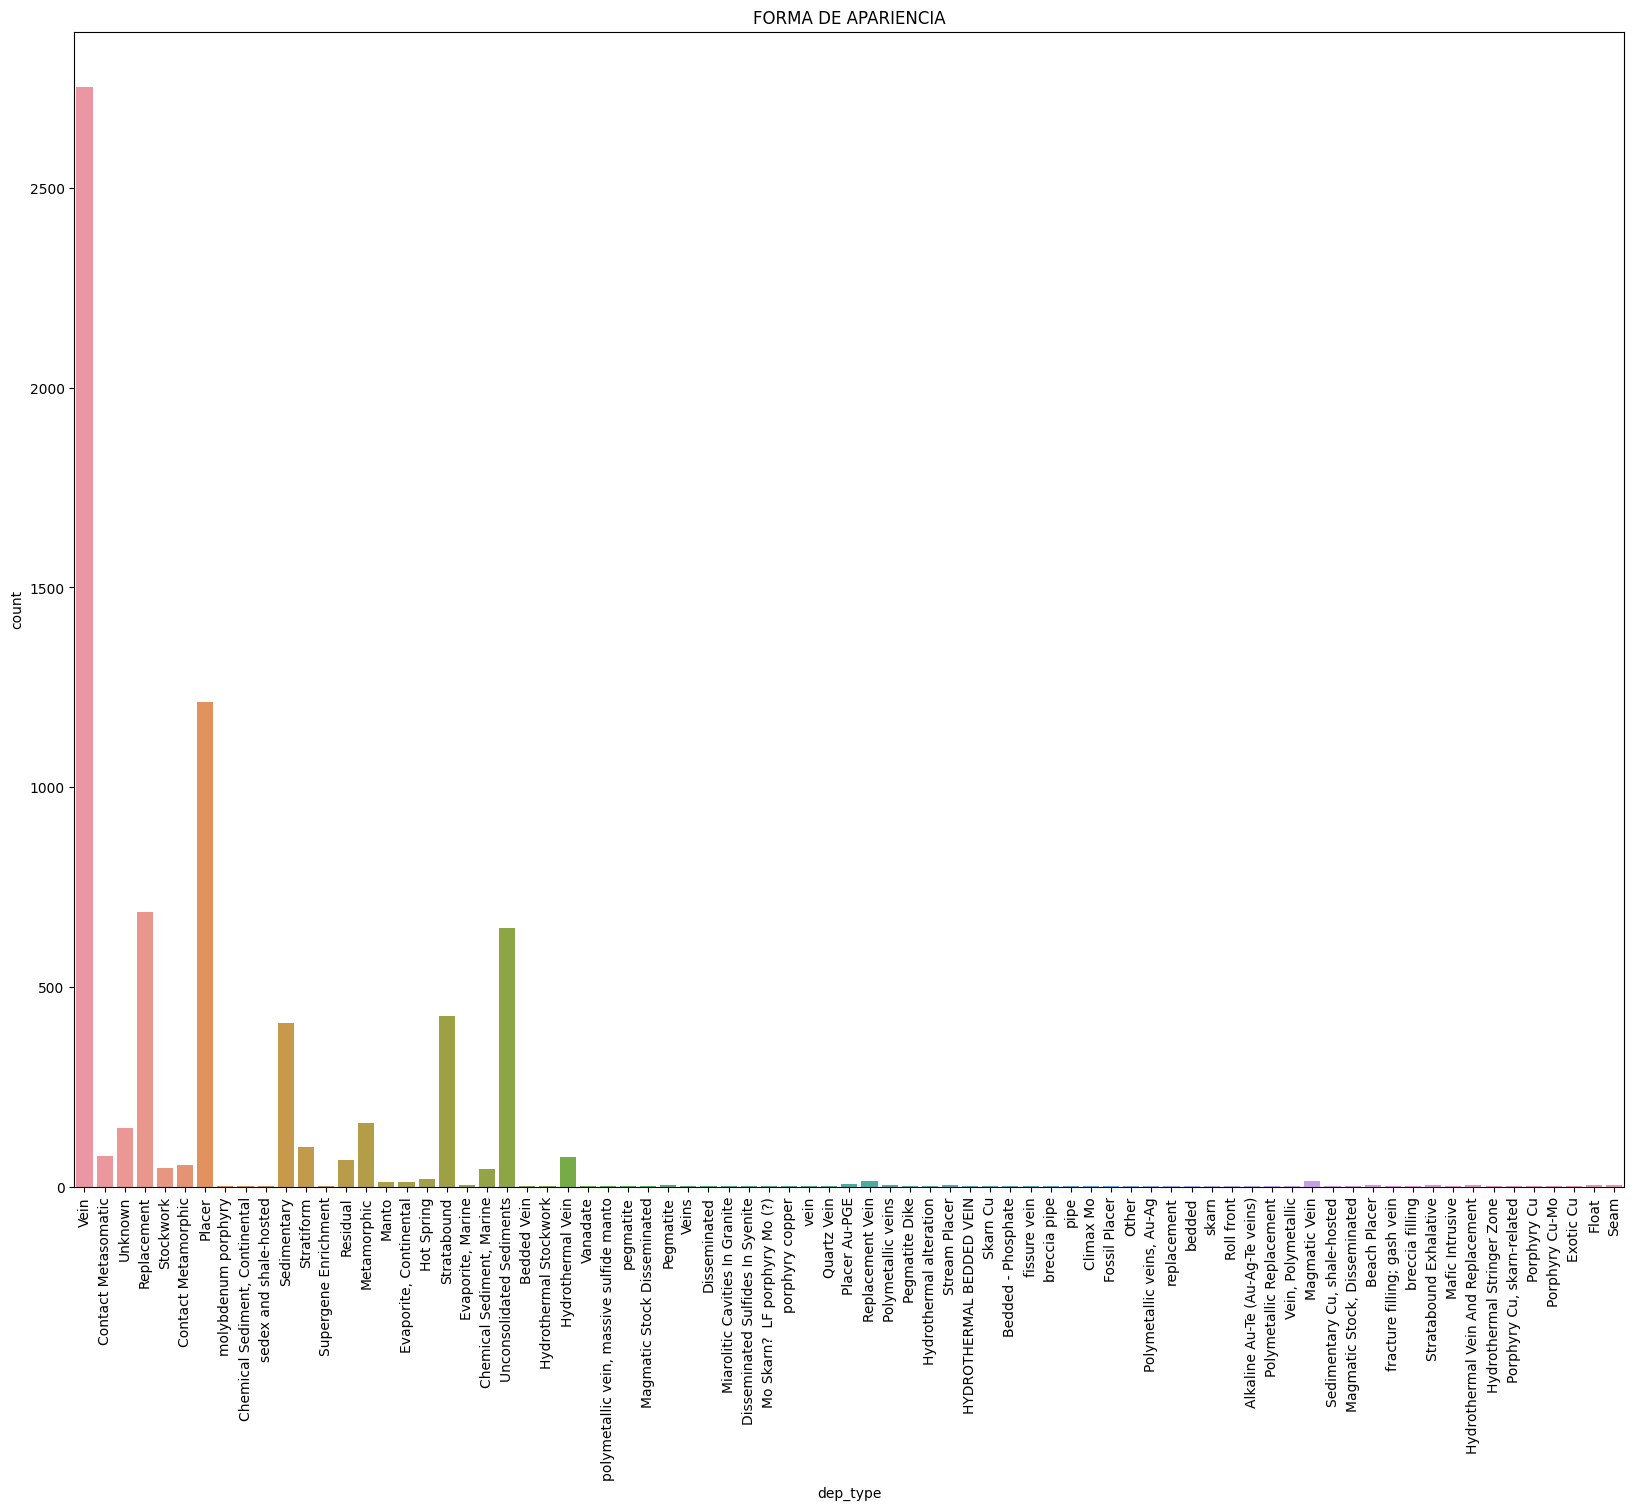

In [35]:
plt.figure(figsize=(20,15))
plt.title("FORMA DE APARIENCIA")
sns.countplot(x=df['dep_type'].head(30000))
plt.xticks(rotation=90)
plt.show()

La principal forma de apariencia es en vetas, es decir cuerpos tabulares que se alojan en las rocas.

## MENA MINERAL

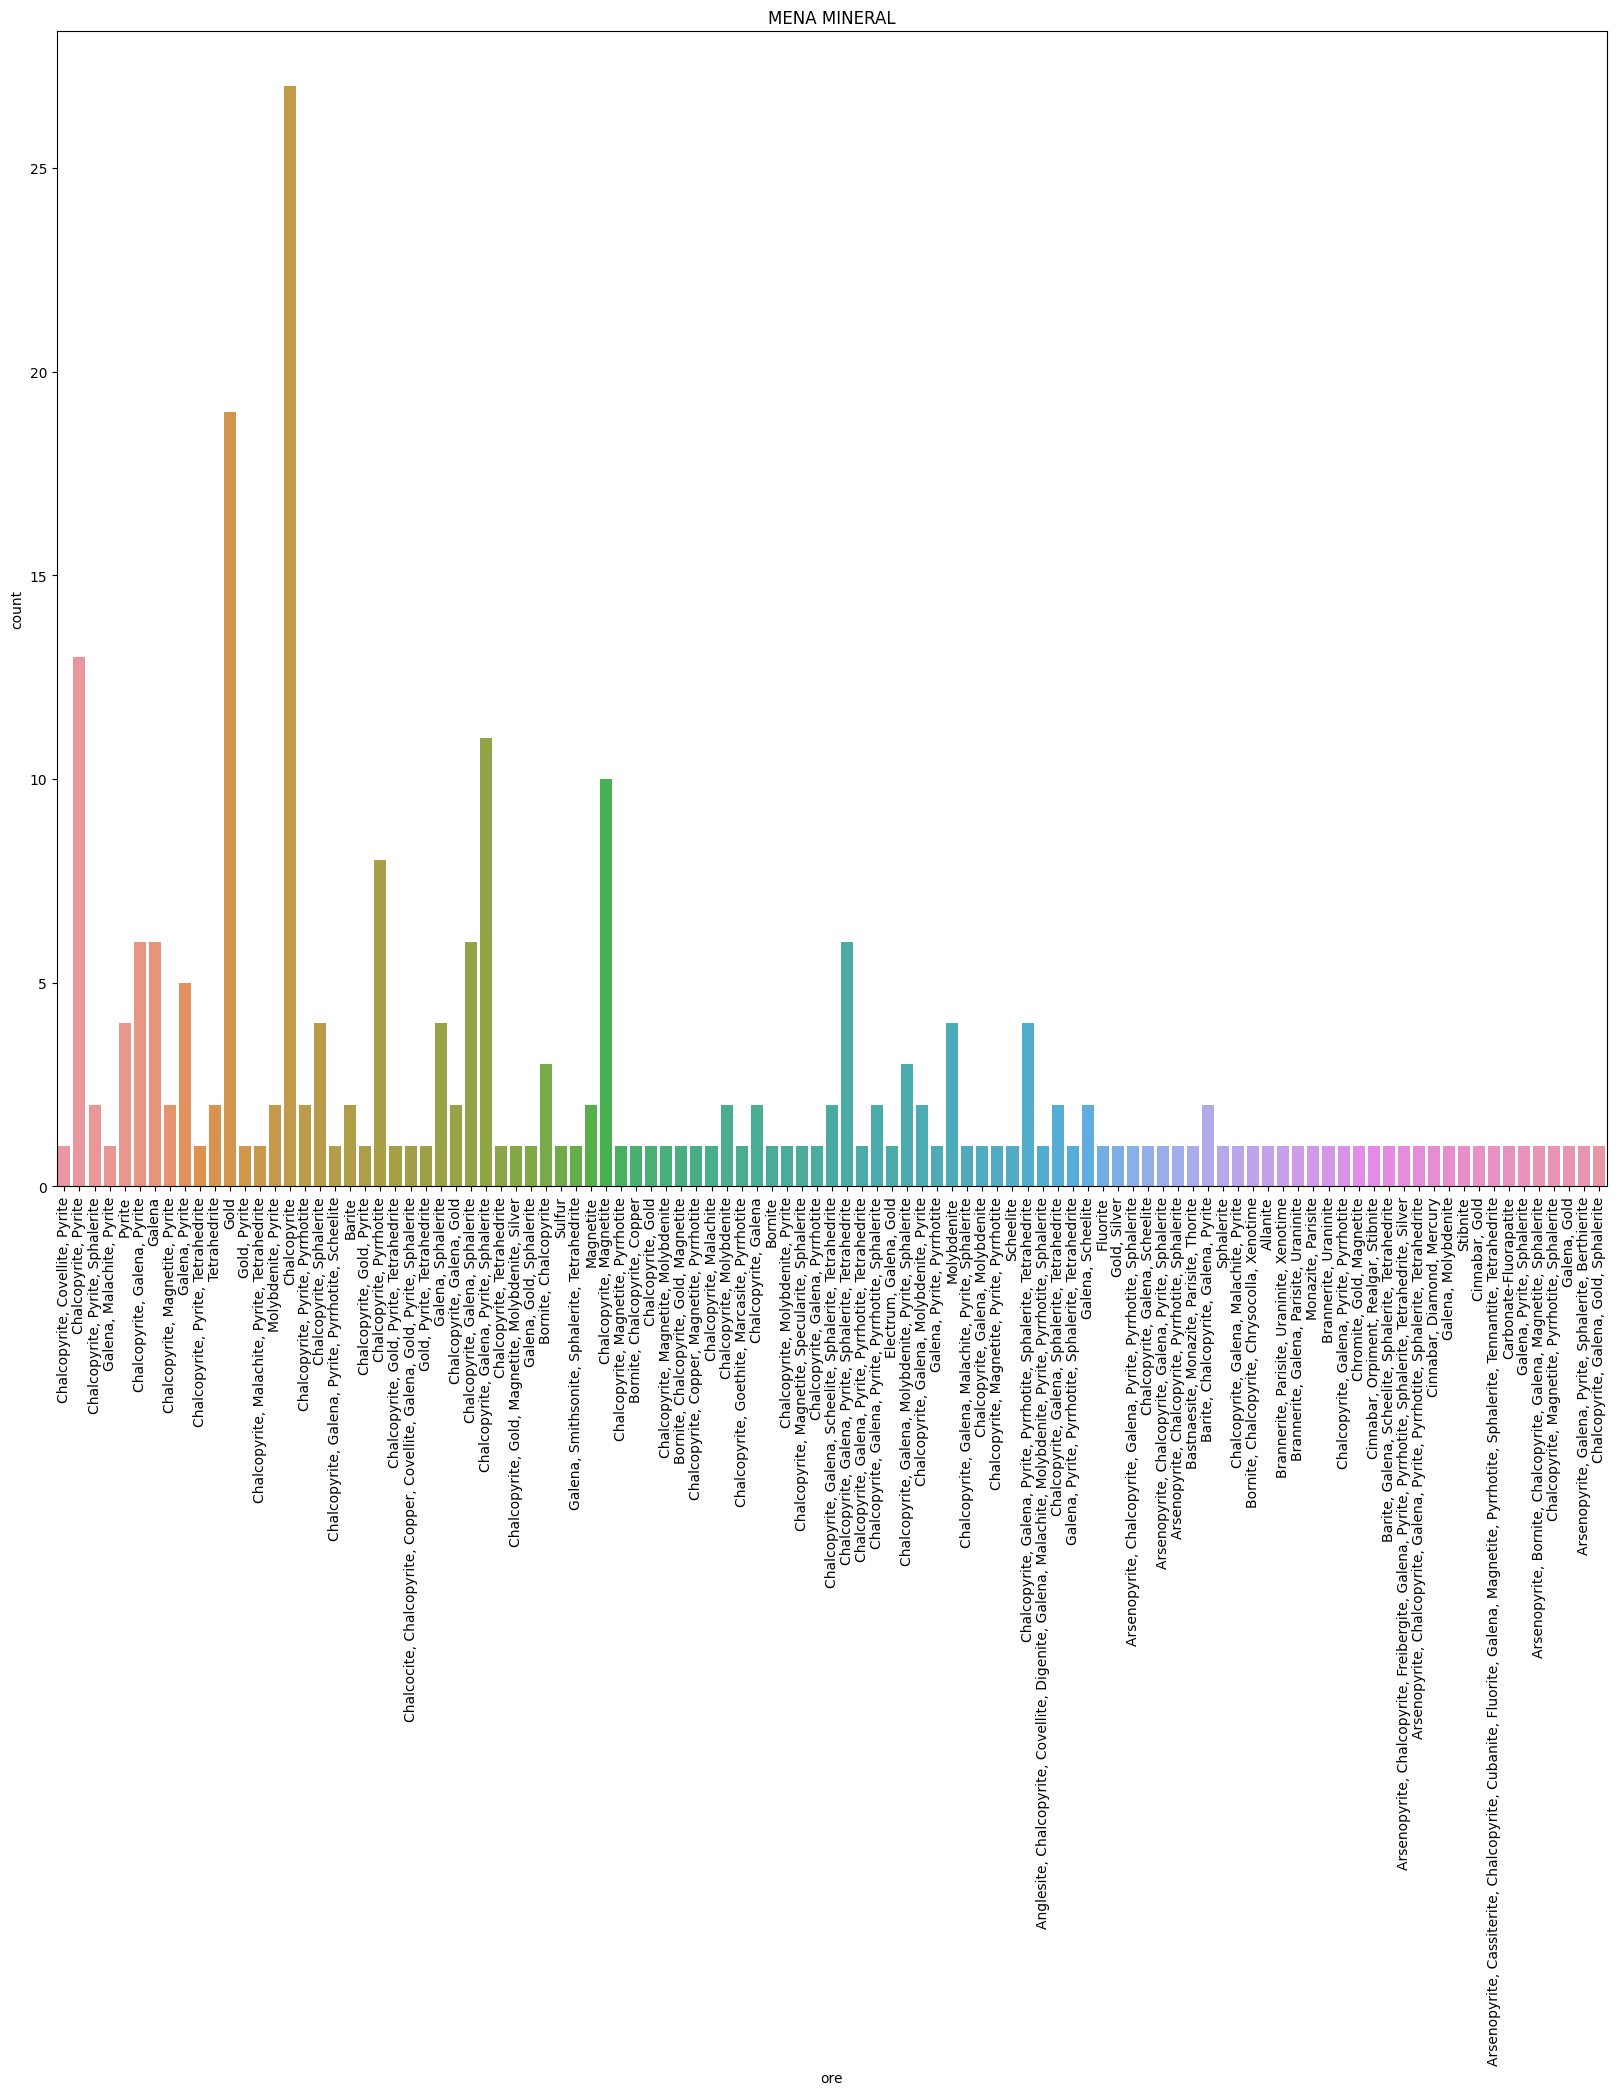

In [36]:
plt.figure(figsize=(20,15))
plt.title("MENA MINERAL")
sns.countplot(x=df['ore'].head(300))
plt.xticks(rotation=90)
plt.show()

El principal mineral que aloja al oro es un sulfuro llamado calcopirita.

## FORMA DE EXTRACCIÓN DEL MINERAL

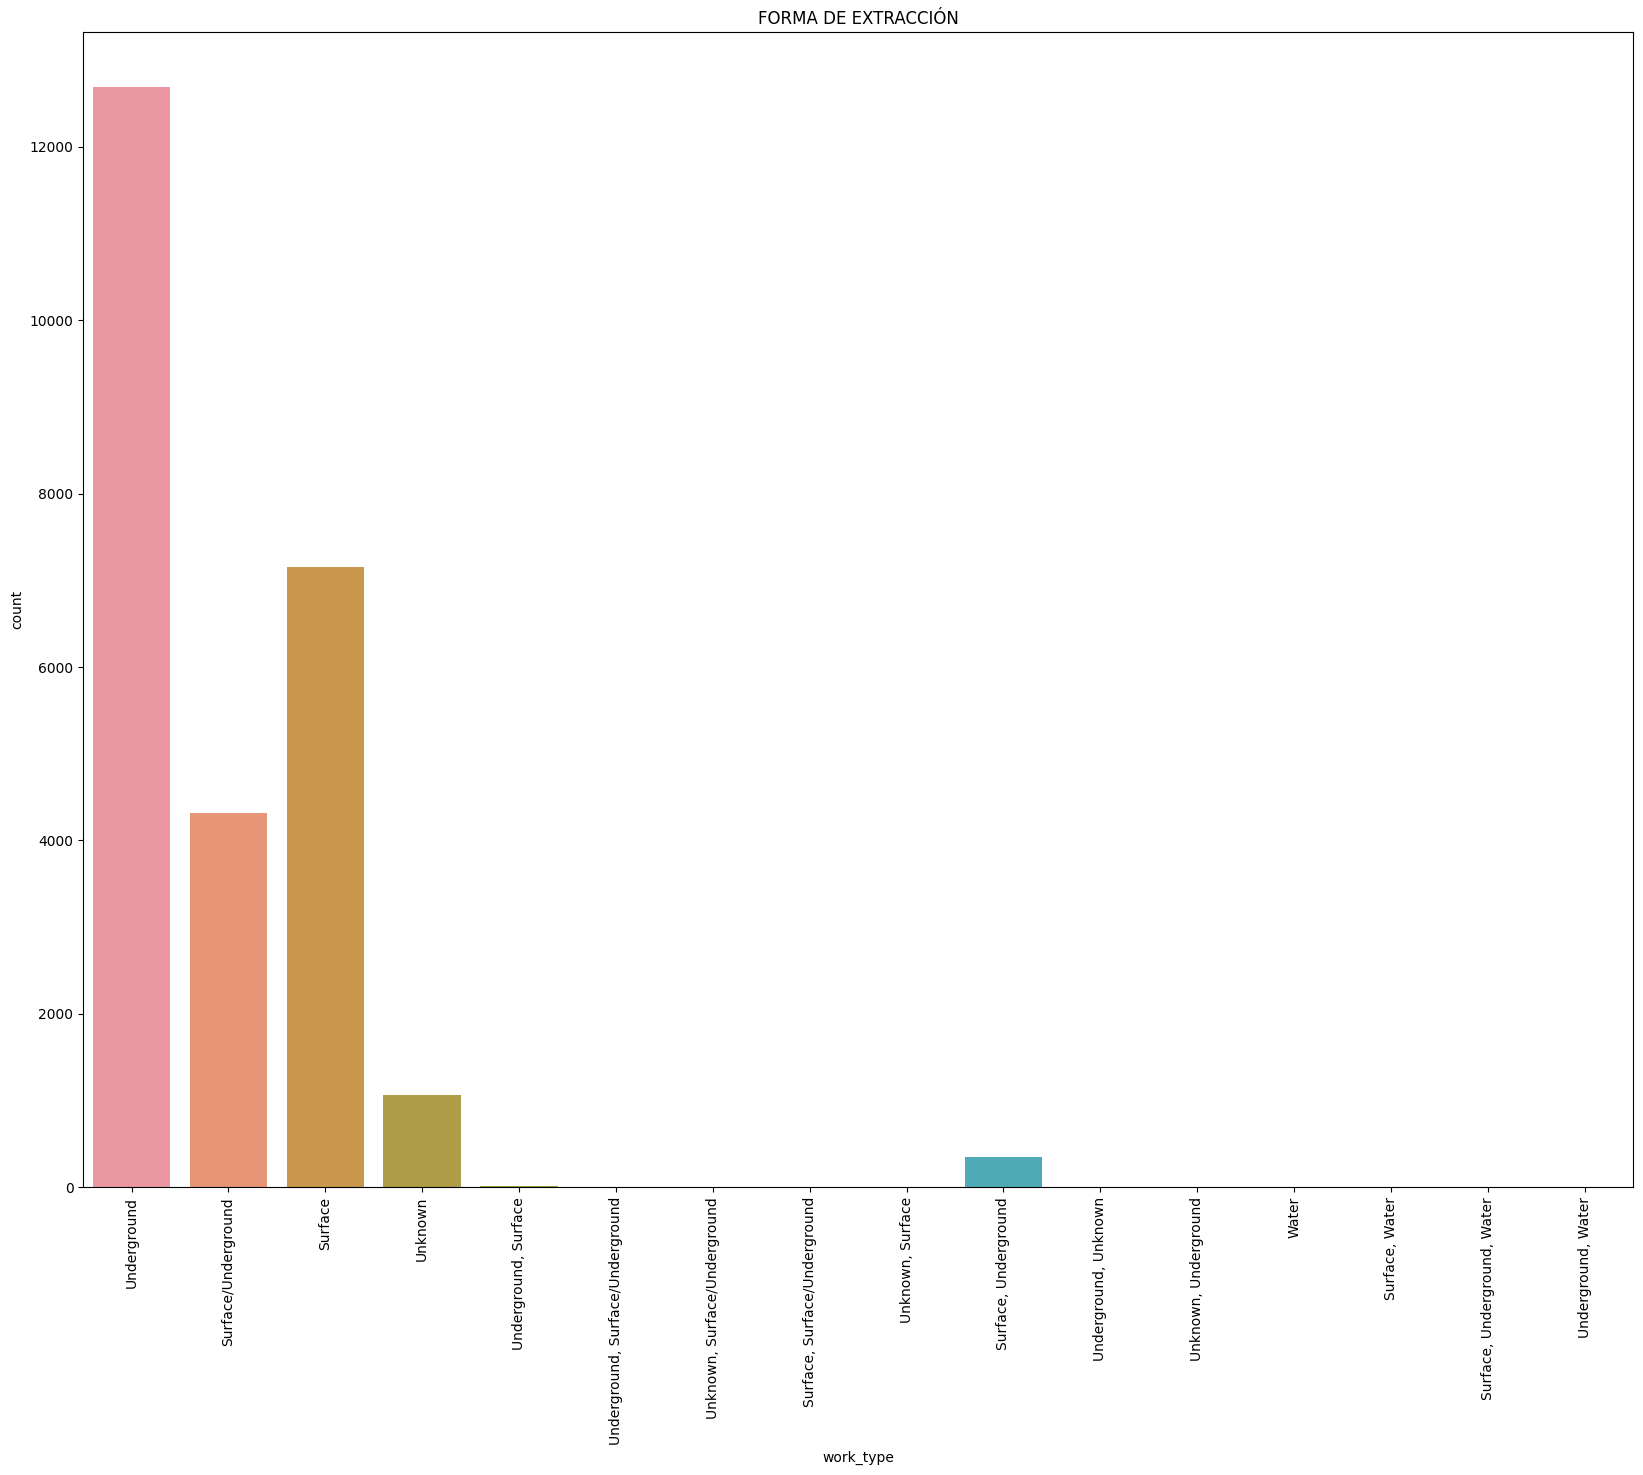

In [37]:
plt.figure(figsize=(20,15))
plt.title("FORMA DE EXTRACCIÓN")
sns.countplot(x=df['work_type'])
plt.xticks(rotation=90)
plt.show()

# DEPOSITOS MINERALES EN ARGENTINA

## Introducción

### Argentina tiene una importante tradición minera con más de un siglo de actividad destacándose la producción de oro, plata, plomo, aluminio y cobre. La creciente demanda mundial de minerales como litio y silicio ubican al país con un nuevo protagonismo.
### Los minerales forman parte activa de nuestras vidas. Están en todas las cosas que utilizamos y consumimos y en proporciones mayores a las que comúnmente imaginamos.


In [13]:
df_ARG = df[df['country']== 'Argentina']
df_ARG.head(10)


,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,...,dep_type,prod_size,dev_stat,ore,gangue,work_type,names,ore_ctrl,hrock_type,arock_type
59,La Chola,-36.48083,-69.64946,SA,Argentina,Mendoza,NaN,N,Sulfur,NaN,...,NaN,N,Occurrence,Sulfur,NaN,NaN,NaN,NaN,NaN,NaN
184,La Araucana,-38.26420,-70.51615,SA,Argentina,Neuquen,NaN,M,"Lead, Silver, Zinc",NaN,...,NaN,U,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,"El Varon, Jorgito",-38.26420,-70.09946,SA,Argentina,Neuquen,NaN,M,"Lead, Silver, Zinc",NaN,...,NaN,U,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,"Amelia, Belen Teresa",-38.18086,-70.54948,SA,Argentina,Neuquen,NaN,M,"Lead, Silver, Zinc",NaN,...,NaN,U,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840,La Ventana,-39.11421,-69.58277,SA,Argentina,Neuquen,NaN,M,"Lead, Silver, Zinc",NaN,...,NaN,U,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999,Numen,-37.03751,-70.39948,SA,Argentina,Neuquen,NaN,M,"Lead, Silver, Zinc",NaN,...,NaN,U,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1151,La Chiquita,-38.03085,-69.91613,SA,Argentina,Neuquen,NaN,M,"Silver, Lead, Zinc",NaN,...,NaN,U,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1251,4 De Mayo,-38.14753,-70.44948,SA,Argentina,Neuquen,NaN,M,"Lead, Silver, Zinc",NaN,...,NaN,U,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1343,Juana M. Gorriti Occurence,-23.46002,-66.85446,SA,Argentina,Jujuy,NaN,M,Manganese,NaN,...,NaN,N,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1403,Don Tomas,-22.99141,-65.41248,SA,Argentina,Jujuy,NaN,M,Copper,NaN,...,NaN,N,Occurrence,NaN,NaN,NaN,"El Viento, Don Francisco",NaN,NaN,NaN


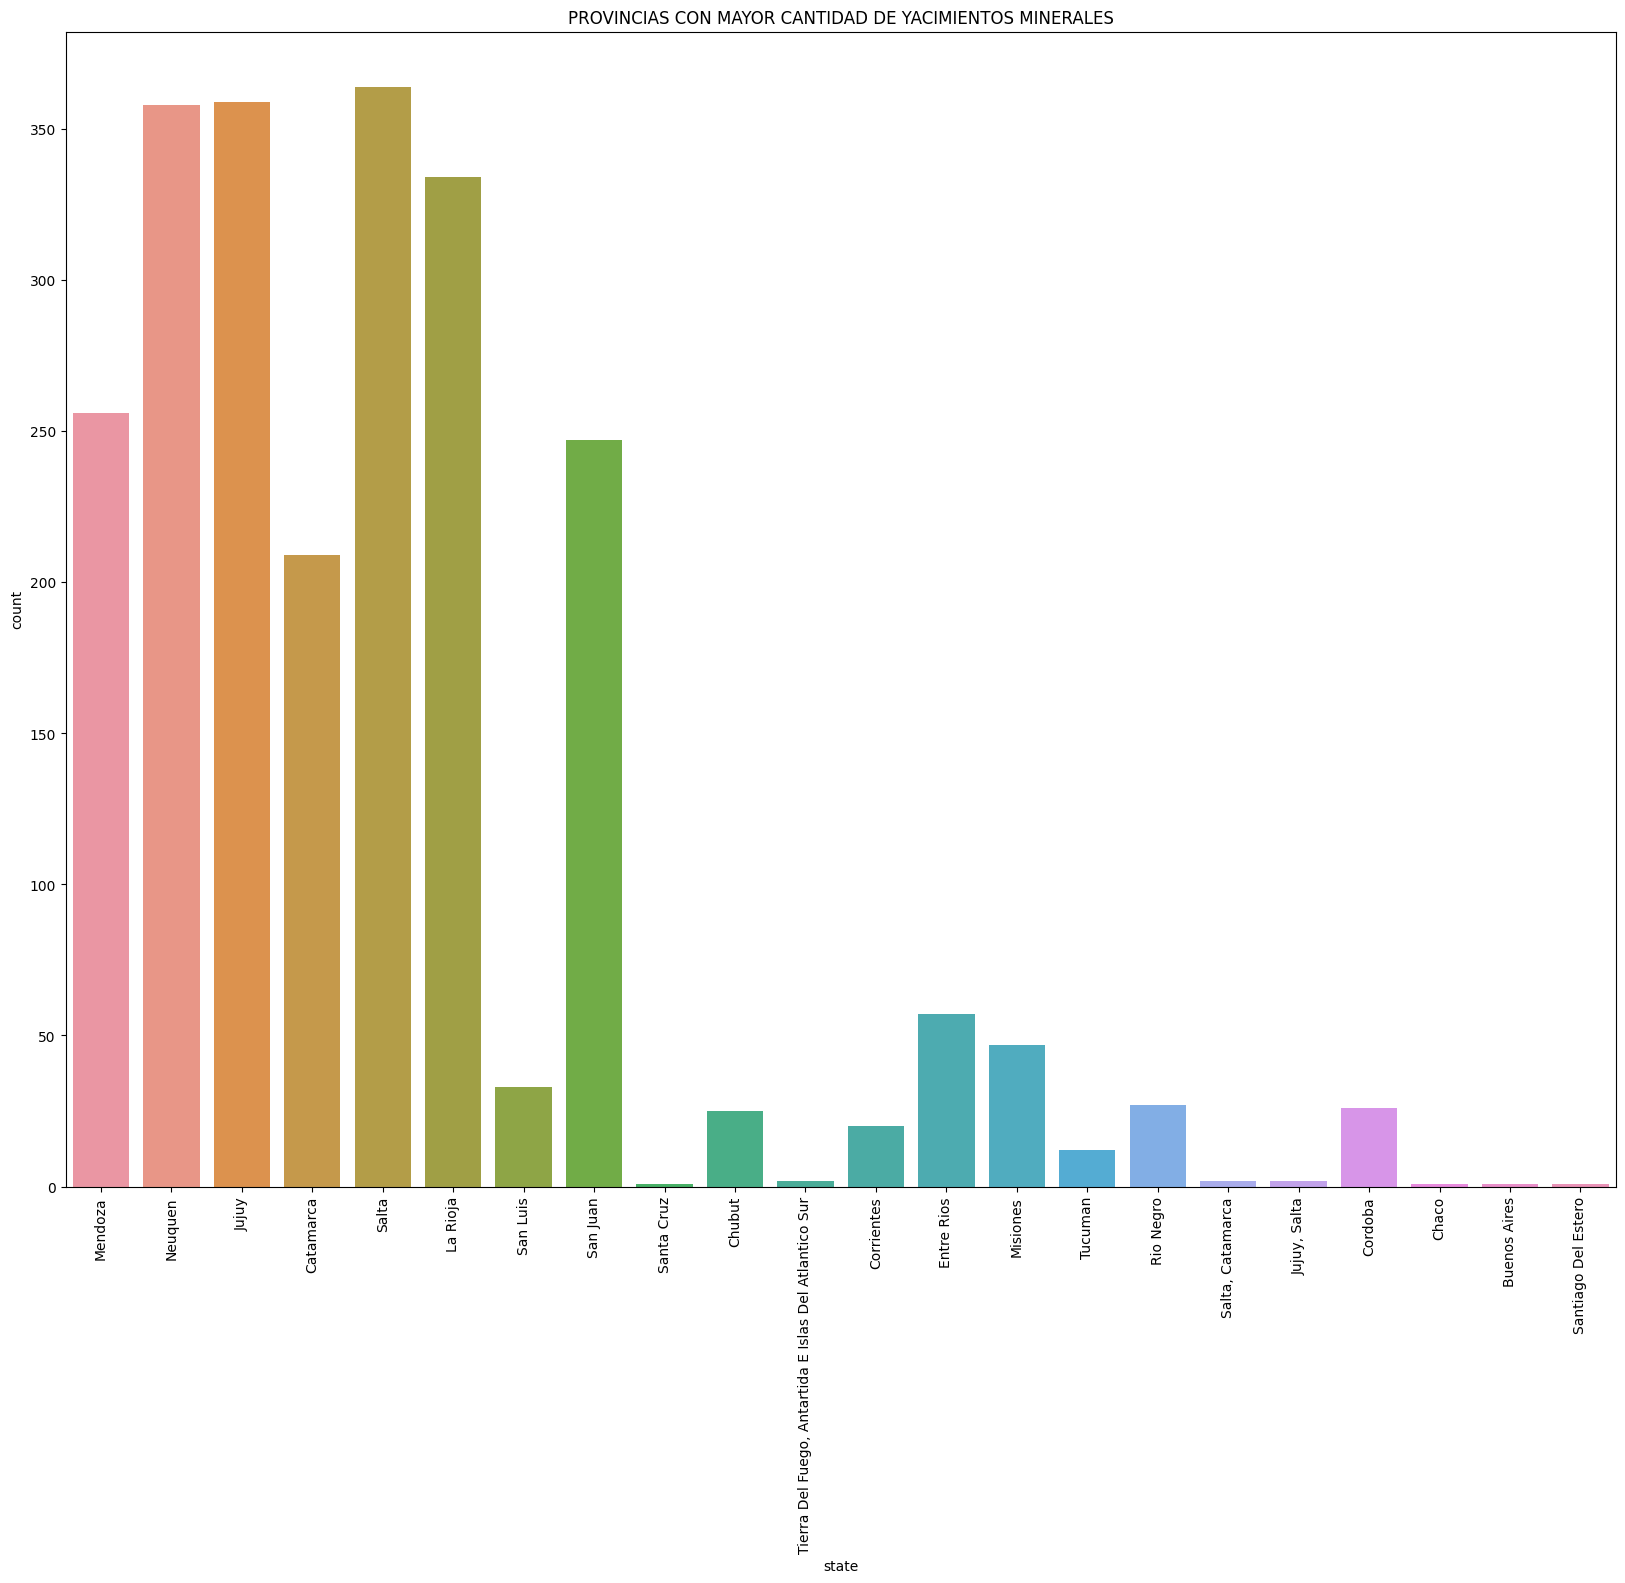

In [14]:
plt.figure(figsize=(20,15))
plt.title("PROVINCIAS CON MAYOR CANTIDAD DE YACIMIENTOS MINERALES")
sns.countplot(x=df_ARG['state'].head(5000))
plt.xticks(rotation=90)
plt.show()


Salta lidera el ranking de provincias en nuestro país con mayor cantidad de yacimientos, seguida por Neuquen y Jujuy.

### YACIMIENTOS DE ORO EN ARGENTINA

In [20]:
df['commod1'] = df['commod1'].fillna('Nan')
gold = df[df['commod1'].str.contains('gold')]
gold_producer = gold[gold['dev_stat'] == 'Producer']
gold_prospect = gold[gold['dev_stat'] == 'Prospect']





In [26]:
prod_res = pd.DataFrame()
prod_res['Country'] = ['United States', 'Argentina', 'Australia', 'Brazil', 'Canada', 'Chile', 'China', 'Portugal', 'Zimbabwe']
prod_res['Production 2019'] = [np.nan, 6300, 45000, 2400, 200, 19300, 10800, 900, 1200]
prod_res['Production 2020'] = [np.nan, 8300, 45000, 2500, 200, 21300, 10850, 1000, 1600]
prod_res['Production 2021'] = [np.nan, 7300, 45000, 2600, 200, 22300, 10420, 2000, 1500]
prod_res['Reserves 2019'] = [750000, 1900000, 4700000, 95000, 530000, 9200000, 1500000, 60000, 220000]
prod_res['Resources'] = [7900000, 19300000, 6400000, 470000, 2900000, 9600000, 5100000, 270000, 500000]


In [27]:
prod_res

,Country,Production 2019,Production 2020,Production 2021,Reserves 2019,Resources
0,United States,NaN,NaN,NaN,750000,7900000
1,Argentina,6300.0,8300.0,7300.0,1900000,19300000
2,Australia,45000.0,45000.0,45000.0,4700000,6400000
3,Brazil,2400.0,2500.0,2600.0,95000,470000
4,Canada,200.0,200.0,200.0,530000,2900000
5,Chile,19300.0,21300.0,22300.0,9200000,9600000
6,China,10800.0,10850.0,10420.0,1500000,5100000
7,Portugal,900.0,1000.0,2000.0,60000,270000
8,Zimbabwe,1200.0,1600.0,1500.0,220000,500000


Se busca comparar entre los principales países portadores de oro, sus producciones en dichos años, las reservas y los recursos que aún quedan.

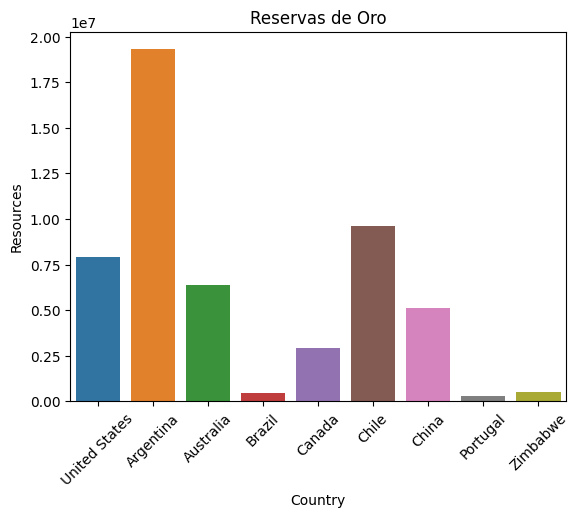

In [28]:
plt.figure()
plt.title("Reservas de Oro")
sns.barplot(x="Country", y="Resources", data=prod_res)
plt.xticks(rotation=45)
plt.show()




### El gráfico anterior busca mostrar las reservas de Oro de acuerdo a los países seleccionados. Es por esto que se puede determinar que Argentina cuenta con las mayores reservas de dicho mineral.

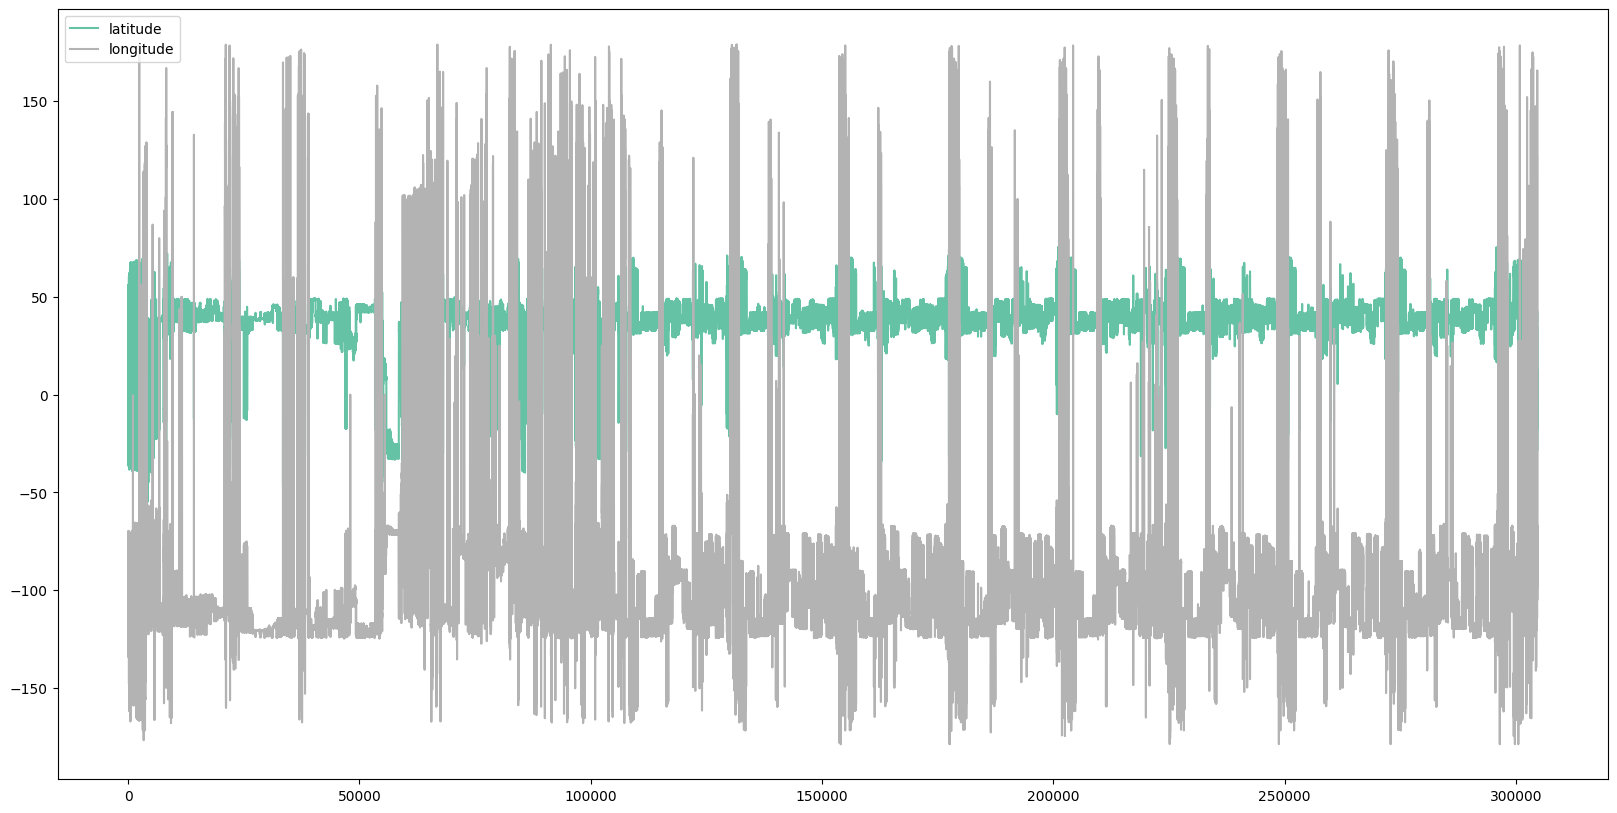

In [20]:
df.plot(figsize=(20,10), column='com_type', cmap='Set2', legend=True);